In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv("data/original.csv",encoding='latin1')

In [3]:
dataset.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [5]:
dataset.isnull().sum().to_frame('NA count')

,NA count
Season,0
DateTime,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
FTR,0
HTHG,924
HTAG,924
HTR,924


In [6]:
pd.DataFrame(data=dataset.isnull().sum()/len(dataset),columns=['NA_ratio'])

,NA_ratio
Season,0.000000
DateTime,0.000000
HomeTeam,0.000000
AwayTeam,0.000000
FTHG,0.000000
FTAG,0.000000
FTR,0.000000
HTHG,0.083146
HTAG,0.083146
HTR,0.083146


Text(0.5, 1.0, 'Total Missing Value (%)')

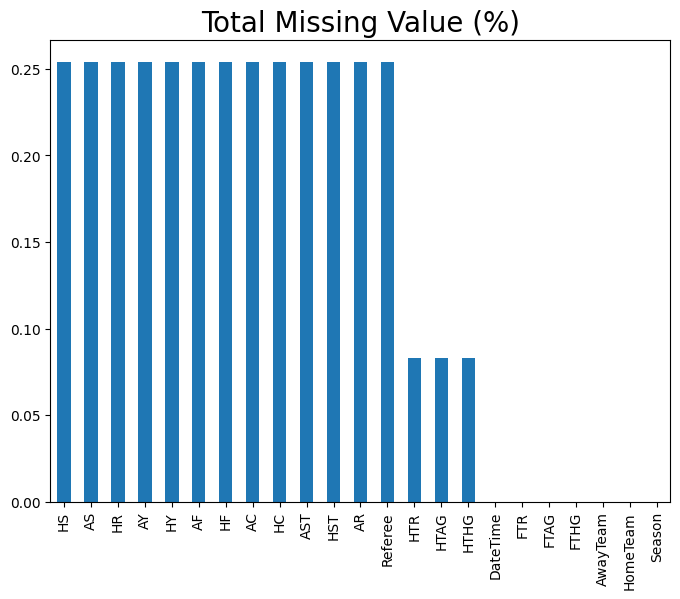

In [7]:
# 결측치 유형 탐색
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(23)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [10]:
# NA값은 제거 
dataset = dataset.dropna(axis = 0)

In [11]:
dataset.shape

(8289, 23)

In [13]:
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        categories = dataset[col].unique()
        print(f'[{col}] ({len(categories)})')

[Season] (22)
[DateTime] (2675)
[HomeTeam] (44)
[AwayTeam] (44)
[FTR] (3)
[HTR] (3)
[Referee] (158)


In [15]:
dataset['HomeTeam'].value_counts()

Man United          415
Arsenal             415
Everton             414
Liverpool           414
Tottenham           414
Chelsea             413
Man City            395
Newcastle           376
West Ham            358
Aston Villa         357
Fulham              285
Southampton         282
Sunderland          266
West Brom           247
Bolton              209
Blackburn           209
Leicester           205
Middlesbrough       190
Stoke               190
Crystal Palace      187
Wigan               152
Wolves              149
Burnley             148
Portsmouth          133
Swansea             133
Charlton            133
Birmingham          133
Norwich             130
Watford             129
Leeds               111
Bournemouth          95
Hull                 95
Brighton             92
QPR                  57
Derby                57
Sheffield United     57
Reading              57
Cardiff              38
Ipswich              38
Huddersfield         38
Blackpool            19
Coventry        

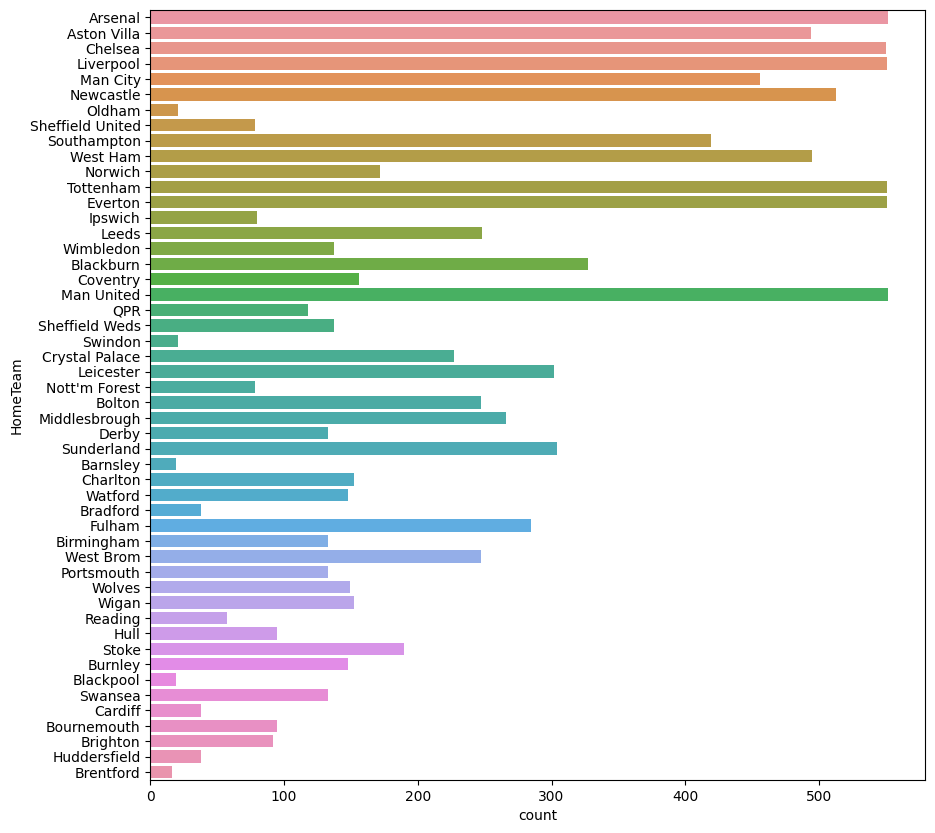

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.countplot(y='HomeTeam', data=dataset)
plt.show()